In [98]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt


# Loading the data

In [99]:
data = pd.read_csv("LP - Data.csv")
data.head(-1)

,Groups,Revenge,Sunday NF,The Simpsons,SportsCenter,Homeland,Rachael Ray,CNN,The Good Wife
0,Men 18-35,5.0,6.0,5.0,0.5,0.7,0.1,0.1,3.0
1,Men 36-55,3.0,5.0,2.0,0.5,0.2,0.1,0.2,5.0
2,Men 56+,1.0,3.0,0.0,0.3,0.0,0.0,0.3,4.0
3,Women 18-35,6.0,1.0,4.0,0.1,0.9,0.6,0.1,3.0
4,Women 36-55,4.0,1.0,2.0,0.1,0.1,1.3,0.2,5.0
5,Women 56+,2.0,1.0,0.0,0.0,0.0,0.4,0.3,4.0
6,Total exposures,21.0,17.0,13.0,1.5,1.9,2.5,1.2,24.0
7,Cost per (1k) ad,140.0,100.0,80.0,9.0,13.0,15.0,8.0,140.0


In [100]:
A = np.array(data[data.columns[1:]].loc[0:5])
A

array([[5. , 6. , 5. , 0.5, 0.7, 0.1, 0.1, 3. ],
       [3. , 5. , 2. , 0.5, 0.2, 0.1, 0.2, 5. ],
       [1. , 3. , 0. , 0.3, 0. , 0. , 0.3, 4. ],
       [6. , 1. , 4. , 0.1, 0.9, 0.6, 0.1, 3. ],
       [4. , 1. , 2. , 0.1, 0.1, 1.3, 0.2, 5. ],
       [2. , 1. , 0. , 0. , 0. , 0.4, 0.3, 4. ]])

In [101]:
b = np.array([60, 60, 28, 60, 60, 28])

In [102]:
c = np.array(data[data.columns[1:]].loc[7])
c

array([140., 100.,  80.,   9.,  13.,  15.,   8., 140.])

In [103]:
x_bound = (0, None)

In [104]:
res = scipy.optimize.linprog(c, integrality=1, A_ub=A*-1, b_ub=b*-1, bounds=(x_bound, x_bound, x_bound, x_bound, x_bound, x_bound, x_bound, x_bound), method='highs')

In [105]:
print("results", res.x)
print("Exposure ", np.dot(A, res.x))
print("Total cost", np.dot(res.x, c))


results [ 0.  0.  7. 28.  6. 10.  0.  6.]
Exposure  [72.2 60.2 32.4 60.2 60.4 28. ]
Total cost 1879.999999999868


## Part 1b

In [106]:
men = np.sum(A[:3], axis=0).reshape(1,-1)
women = np.sum(A[3:], axis=0).reshape(1,-1)

print("men", men)
print("women", women)

men [[ 9.  14.   7.   1.3  0.9  0.2  0.6 12. ]]
women [[12.   3.   6.   0.2  1.   2.3  0.6 12. ]]


In [107]:
new_A = np.concatenate((A, men, women), axis=0)
new_b = np.append(b, [170, 170])

In [108]:
new_A

array([[ 5. ,  6. ,  5. ,  0.5,  0.7,  0.1,  0.1,  3. ],
       [ 3. ,  5. ,  2. ,  0.5,  0.2,  0.1,  0.2,  5. ],
       [ 1. ,  3. ,  0. ,  0.3,  0. ,  0. ,  0.3,  4. ],
       [ 6. ,  1. ,  4. ,  0.1,  0.9,  0.6,  0.1,  3. ],
       [ 4. ,  1. ,  2. ,  0.1,  0.1,  1.3,  0.2,  5. ],
       [ 2. ,  1. ,  0. ,  0. ,  0. ,  0.4,  0.3,  4. ],
       [ 9. , 14. ,  7. ,  1.3,  0.9,  0.2,  0.6, 12. ],
       [12. ,  3. ,  6. ,  0.2,  1. ,  2.3,  0.6, 12. ]])

In [109]:
new_b

array([ 60,  60,  28,  60,  60,  28, 170, 170])

In [110]:
res = scipy.optimize.linprog(c, integrality=1, A_ub=new_A*-1, b_ub=new_b*-1, bounds=(x_bound, x_bound, x_bound, x_bound, x_bound, x_bound, x_bound, x_bound), method='highs')

In [111]:
print("results", res.x)
print("Exposure ", np.dot(new_A, res.x))
print("Total cost", np.dot(res.x, c))

results [0. 0. 7. 9. 0. 8. 0. 9.]
Exposure  [ 67.3  64.3  38.7  60.7  70.3  39.2 170.3 170.2]
Total cost 2021.0


# Part 2

In [112]:
A_total = np.sum(A, axis=0).reshape(1,-1)
print("A_total", A_total)

A_total [[21.  17.  13.   1.5  1.9  2.5  1.2 24. ]]


In [113]:
min_b = (np.sum(b)).reshape(1, -1)
print("total_exp", min_b)

total_exp [[296]]


In [114]:
total_res = {
    "offset": [], 
    "Exposure": [], 
    "Total cost": [], 
    "min_b": [], 
    "Revenge": [], 
    'Sunday NF': [], 
    'The Simpsons':[], 
    'SportsCenter':[],
    'Homeland':[],
    'Rachael Ra':[], 
    'CNN':[], 
    'The Good Wife': []
             }
for offset in range(20, 51, 5):
    min_b = min_b + offset
    res = scipy.optimize.linprog(c, integrality=1, A_ub=A_total*-1, b_ub=min_b*-1, bounds=(x_bound, x_bound, x_bound, x_bound, x_bound, x_bound, x_bound, x_bound), method='highs')
    total_res["offset"].append(offset)
    total_res["min_b"].append(min_b[0][0])
    total_res["Exposure"].append((np.dot(A_total, res.x))[0])
    total_res["Total cost"].append(np.dot(res.x, c))

    total_res['Revenge'].append(res.x[0])
    total_res['Sunday NF'].append(res.x[1])
    total_res['The Simpsons'].append(res.x[2])
    total_res['SportsCenter'].append(res.x[3])
    total_res['Homeland'].append(res.x[4])
    total_res['Rachael Ra'].append(res.x[5])
    total_res['CNN'].append(res.x[6])
    total_res['The Good Wife'].append(res.x[7])


In [115]:
total_df = pd.DataFrame(total_res)
total_df

,offset,Exposure,Total cost,min_b,Revenge,Sunday NF,The Simpsons,SportsCenter,Homeland,Rachael Ra,CNN,The Good Wife
0,20,316.0,1844.0,316,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.0
1,25,341.0,1990.0,341,0.0,0.0,0.0,0.0,0.0,2.0,0.0,14.0
2,30,371.0,2166.0,371,0.0,0.0,0.0,4.0,0.0,2.0,0.0,15.0
3,35,406.0,2370.0,406,0.0,1.0,0.0,0.0,0.0,2.0,0.0,16.0
4,40,446.0,2604.0,446,0.0,0.0,0.0,1.0,0.0,5.0,0.0,18.0
5,45,491.0,2866.0,491,0.0,0.0,0.0,4.0,0.0,2.0,0.0,20.0
6,50,541.0,3158.0,541,0.0,0.0,0.0,2.0,0.0,4.0,0.0,22.0


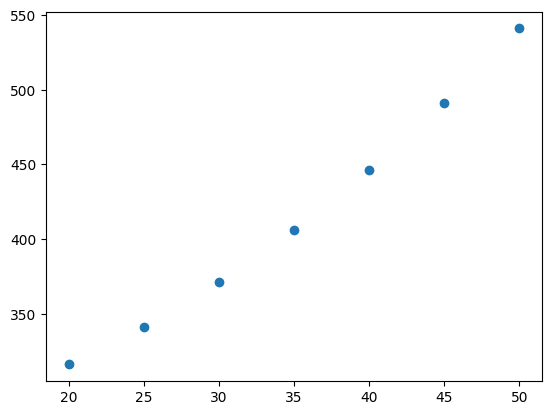

In [116]:
plt.scatter(total_df["offset"], total_df["Exposure"])

# Part 5

In [117]:
data = pd.read_csv("Apartment - Data.csv")
data.head()

,Type,Efficiency,1-BR,2-BR,3-BR
0,Size,500.0,700,800,1000
1,Rental Income,1750.0,2250,2750,3750
2,Min Count,0.0,5,8,0
3,Max Count,NaN,15,20,12


In [118]:
c = np.array(data[data.columns[1:]].loc[1])
c

array([1750., 2250., 2750., 3750.])

## Get the bounds for the variables

In [119]:
import math
bounds = []
for col in data.columns[1:]:
    min_bound = data[col].loc[2]
    max_bound = data[col].loc[3]
    if math.isnan(max_bound):
        max_bound = None
    if math.isnan(min_bound):
        max_bound = None

    bounds.append((min_bound, max_bound))

bounds = tuple(bounds)


In [120]:
b = np.array([[40000, 40]])
b

array([[40000,    40]])

In [121]:
A = np.array(data[data.columns[1:]].loc[0]).reshape(1,-1)
A = np.concatenate((A, np.ones((1, A.shape[1]))), axis=0) 
A

array([[ 500.,  700.,  800., 1000.],
       [   1.,    1.,    1.,    1.]])

In [122]:
res = scipy.optimize.linprog(c*-1, A_ub=A, b_ub=b, bounds=bounds, method='highs')

In [123]:
print("results", res.x)
print("Total Square foot", np.dot(A, res.x)[0])
print("Total Number of apartments",np.dot(A, res.x)[1])
print("Max Earning", np.dot(res.x, c))

results [ 0.  8. 20. 12.]
Total Square foot 33600.0
Total Number of apartments 40.0
Max Earning 118000.0


In [124]:
res.lower

  residual: [ 0.000e+00  3.000e+00  1.200e+01  1.200e+01]
 marginals: [ 5.000e+02  0.000e+00  0.000e+00  0.000e+00]

## 2.2

In [125]:
b = np.array([[40000, 43]])
b

array([[40000,    43]])

In [126]:
res = scipy.optimize.linprog(c*-1, A_ub=A, b_ub=b, bounds=bounds, method='highs')

In [127]:
print("results", res.x)
print("Total Square foot", np.dot(A, res.x)[0])
print("Total Number of apartments",np.dot(A, res.x)[1])
print("Max Earning", np.dot(res.x, c))

results [ 0. 11. 20. 12.]
Total Square foot 35700.0
Total Number of apartments 43.0
Max Earning 124750.0


In [128]:
total_res = {"apt_count": [], "Total Square foot": [], "Total Number of apartments": [], "Max Earning": [], "Efficiency": [], "1 Bedroom": [], "2 Bedroom": [], "3 Bedroom": []}
for apt_count in range(40, 61, 2):
    b = np.array([[40000, apt_count]])
    res = scipy.optimize.linprog(c*-1, A_ub=A, b_ub=b, bounds=bounds, method='highs')

    total_res["apt_count"].append(apt_count)

    total_res["Efficiency"].append(res.x[0])
    total_res["1 Bedroom"].append(res.x[1])
    total_res["2 Bedroom"].append(res.x[2])
    total_res["3 Bedroom"].append(res.x[3])

    total_res["Total Square foot"].append(np.dot(A, res.x)[0])
    total_res["Total Number of apartments"].append(np.dot(A, res.x)[1])
    total_res["Max Earning"].append(np.dot(res.x, c))

In [129]:
res_df = pd.DataFrame(total_res)
res_df

,apt_count,Total Square foot,Total Number of apartments,Max Earning,Efficiency,1 Bedroom,2 Bedroom,3 Bedroom
0,40,33600.0,40.0,118000.000000,0.000000,8.0,20.000000,12.0
1,42,35000.0,42.0,122500.000000,0.000000,10.0,20.000000,12.0
2,44,36400.0,44.0,127000.000000,0.000000,12.0,20.000000,12.0
3,46,37800.0,46.0,131500.000000,0.000000,14.0,20.000000,12.0
4,48,39000.0,48.0,135500.000000,1.000000,15.0,20.000000,12.0
5,50,40000.0,50.0,139000.000000,3.000000,15.0,20.000000,12.0
6,52,40000.0,52.0,140000.000000,10.000000,10.0,20.000000,12.0
7,54,40000.0,54.0,141000.000000,17.000000,5.0,20.000000,12.0
8,56,40000.0,56.0,141166.666667,22.333333,5.0,16.666667,12.0
9,58,40000.0,58.0,141333.333333,27.666667,5.0,13.333333,12.0


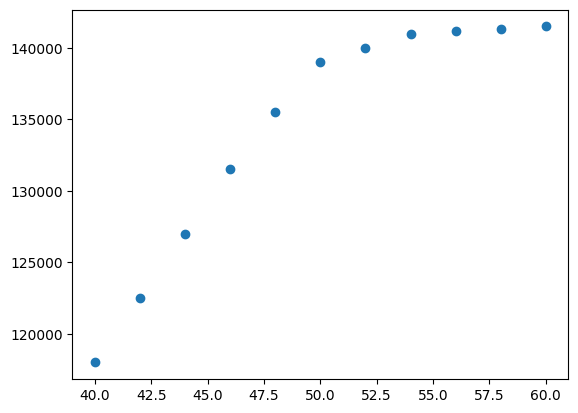

In [130]:
plt.scatter(res_df["apt_count"], res_df["Max Earning"])